In [ ]:
import os
import sys

ROOT_DIR = os.path.abspath("..")
if ROOT_DIR not in sys.path:
    sys.path.append(ROOT_DIR)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.data import load_train, load_test
from src.features import add_basic_lag_features

# Plot style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
pd.set_option("display.max_columns", 100)

### Load Data


In [15]:
train = load_train()
test = load_test()

print("Train shape:", train.shape)
print("Test shape :", test.shape)

train.head()

Train shape: (9021, 98)
Test shape : (10, 99)


,date_id,D1,D2,D3,D4,D5,D6,D7,D8,D9,E1,E10,E11,E12,E13,E14,E15,E16,E17,E18,E19,E2,E20,E3,E4,E5,E6,E7,E8,E9,I1,I2,I3,I4,I5,I6,I7,I8,I9,M1,M10,M11,M12,M13,M14,M15,M16,M17,M18,M2,M3,M4,M5,M6,M7,M8,M9,P1,P10,P11,P12,P13,P2,P3,P4,P5,P6,P7,P8,P9,S1,S10,S11,S12,S2,S3,S4,S5,S6,S7,S8,S9,V1,V10,V11,V12,V13,V2,V3,V4,V5,V6,V7,V8,V9,forward_returns,risk_free_rate,market_forward_excess_returns
0,0,0,0,0,1,1,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002421,0.000301,-0.003038
1,1,0,0,0,1,1,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008495,0.000303,-0.009114
2,2,0,0,0,1,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009624,0.000301,-0.010243
3,3,0,0,0,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004662,0.000299,0.004046
4,4,0,0,0,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011686,0.000299,-0.012301


In [14]:
# Quick summary stats for numeric columns
train.describe().T.tail(20)

,count,mean,std,min,25%,50%,75%,max
S6,8015.0,0.515287,0.288787,0.000661,0.273148,0.518519,0.761574,1.000000
S7,8015.0,0.494731,0.307013,0.000661,0.216104,0.484788,0.769676,1.000000
S8,6012.0,0.079207,1.097029,-3.876846,-0.636295,0.343062,0.954337,2.311538
S9,8015.0,0.456539,0.328112,0.000661,0.141534,0.458995,0.750331,1.000000
V1,8015.0,0.325772,0.345797,0.000661,0.000661,0.197751,0.637897,1.000000
V10,2972.0,-0.003620,1.241267,-1.473543,-0.816890,-0.389675,0.548064,12.742190
V11,8015.0,0.230551,0.315737,0.000661,0.000661,0.000661,0.460979,1.000000
V12,8015.0,0.253973,0.306309,0.000661,0.000661,0.099868,0.475529,1.000000
V13,7510.0,0.111299,1.328520,-4.770347,-0.687401,-0.224787,0.473610,24.151465
V2,8015.0,0.508960,0.305945,0.000661,0.242725,0.513228,0.776455,1.000000


#### Cell 4 – Target & key numeric columns overview

In [16]:
target_col = "market_forward_excess_returns"

train[target_col].describe()

count    9021.000000
mean        0.000053
std         0.010558
min        -0.040582
25%        -0.004747
50%         0.000255
75%         0.005479
max         0.040551
Name: market_forward_excess_returns, dtype: float64

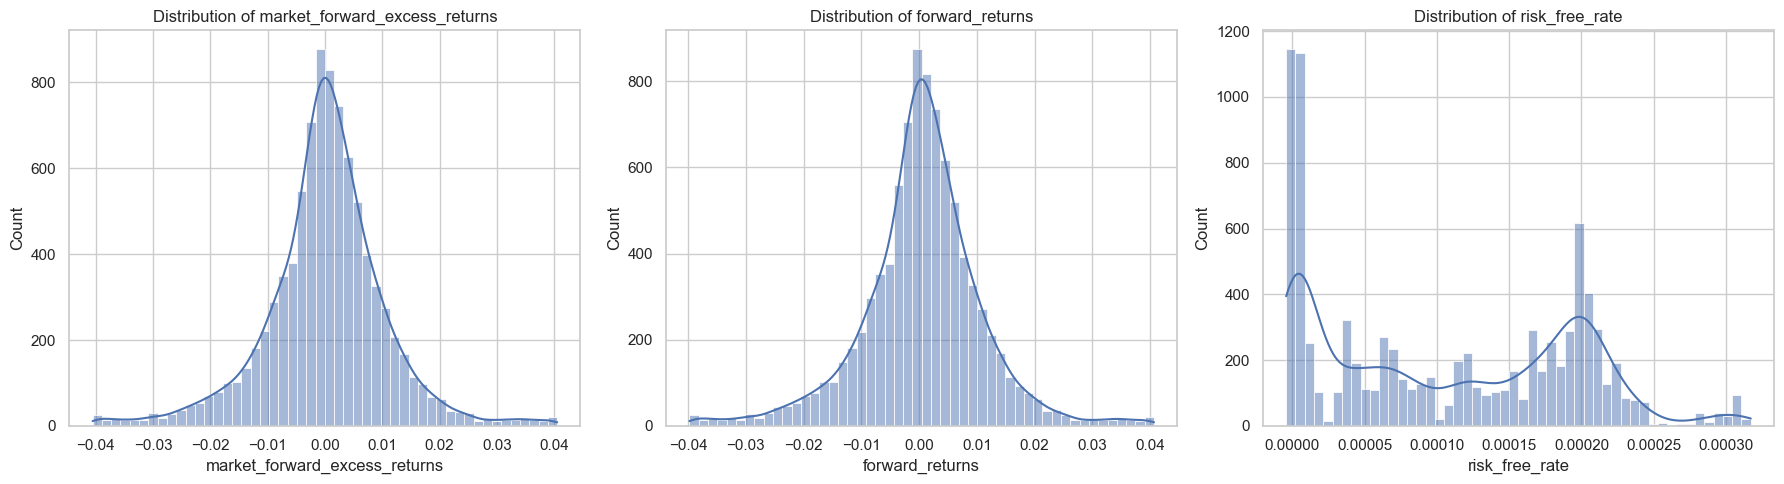

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(train[target_col], bins=50, ax=axes[0], kde=True)
axes[0].set_title("Distribution of market_forward_excess_returns")

sns.histplot(train["forward_returns"], bins=50, ax=axes[1], kde=True)
axes[1].set_title("Distribution of forward_returns")

sns.histplot(train["risk_free_rate"], bins=50, ax=axes[2], kde=True)
axes[2].set_title("Distribution of risk_free_rate")

plt.tight_layout()
plt.show()

#### Check time coverage & target drift

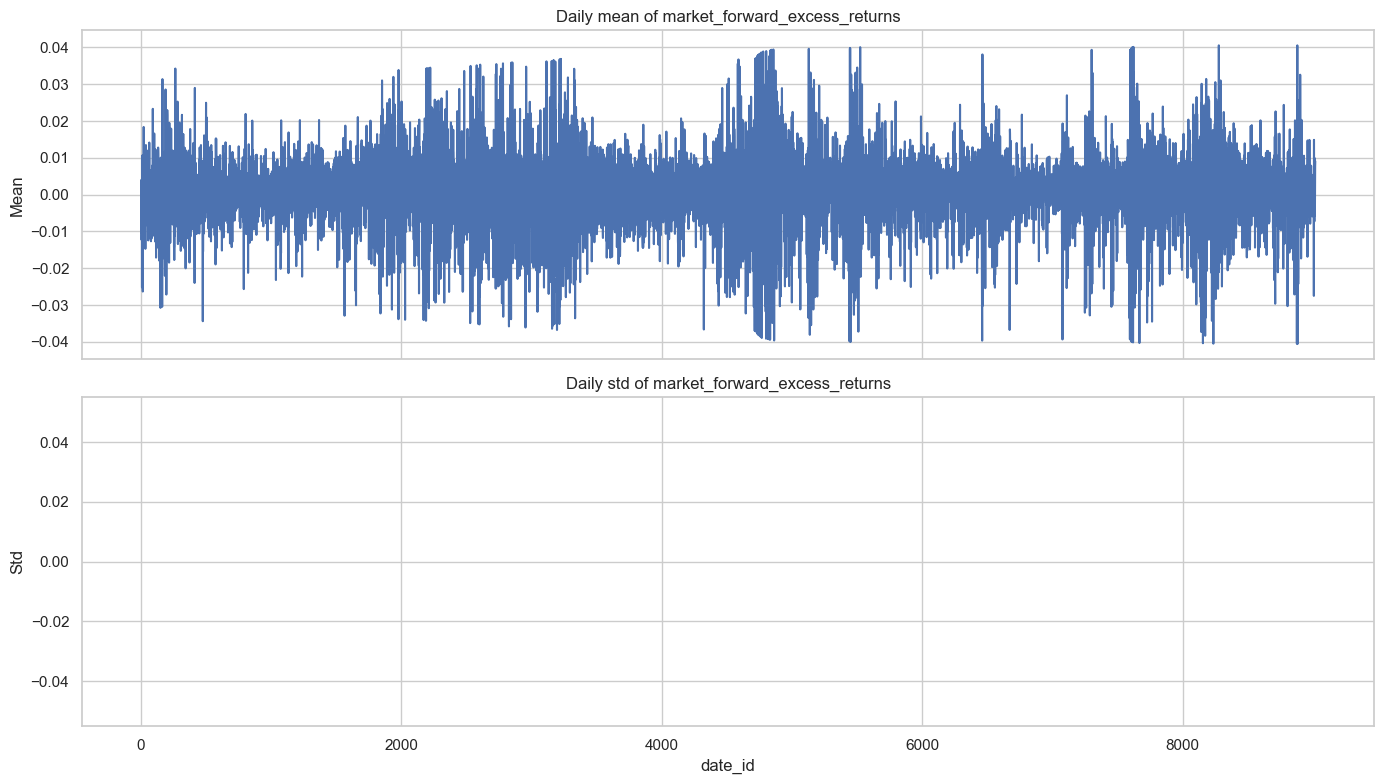

In [18]:
# Ensure sorted by date_id
train = train.sort_values("date_id").reset_index(drop=True)

# Aggregate by day: mean and std of target
daily_stats = train.groupby("date_id")[target_col].agg(["mean", "std"]).reset_index()

fig, axes = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

axes[0].plot(daily_stats["date_id"], daily_stats["mean"])
axes[0].set_title("Daily mean of market_forward_excess_returns")
axes[0].set_ylabel("Mean")

axes[1].plot(daily_stats["date_id"], daily_stats["std"])
axes[1].set_title("Daily std of market_forward_excess_returns")
axes[1].set_ylabel("Std")
axes[1].set_xlabel("date_id")

plt.tight_layout()
plt.show()

#### Missing values overview

In [19]:
# Overall missingness
missing_counts = train.isna().sum()
missing_frac = (missing_counts / len(train)).sort_values(ascending=False)

missing_df = pd.DataFrame({
    "missing_count": missing_counts,
    "missing_frac": missing_frac,
})
missing_df.head(20)

,missing_count,missing_frac
D1,0,0.000000
D2,0,0.000000
D3,0,0.000000
D4,0,0.000000
D5,0,0.000000
D6,0,0.000000
D7,0,0.000000
D8,0,0.000000
D9,0,0.000000
E1,1784,0.197761


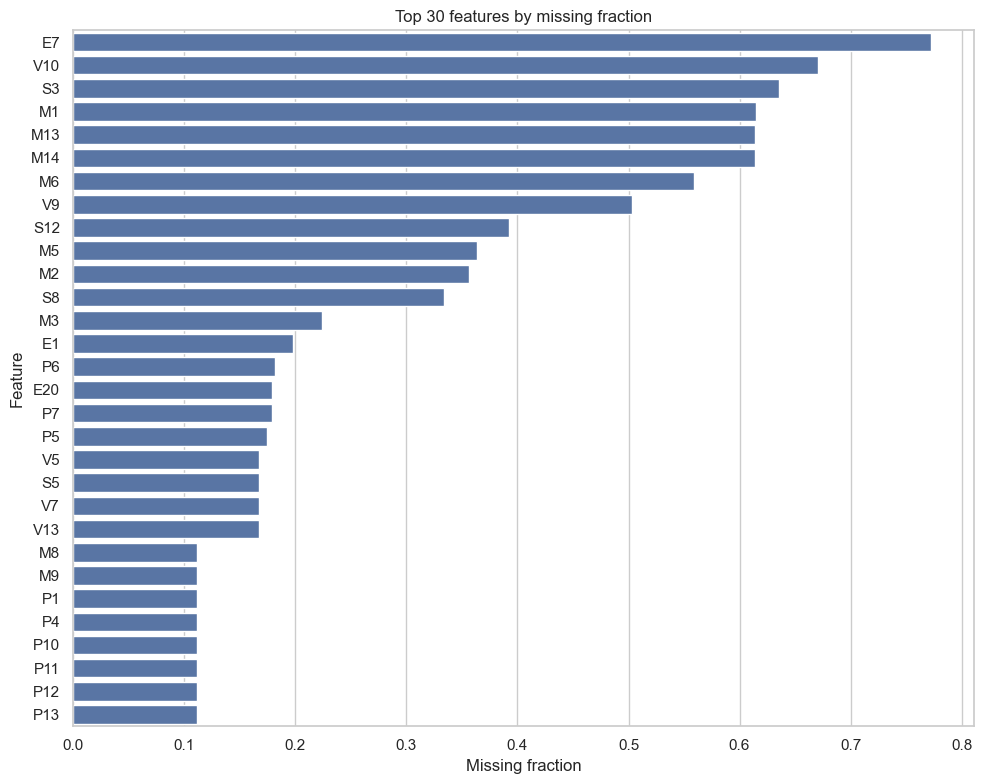

In [20]:
# Plot top 30 most-missing features
top_missing = missing_frac.head(30)

plt.figure(figsize=(10, 8))
sns.barplot(x=top_missing.values, y=top_missing.index)
plt.title("Top 30 features by missing fraction")
plt.xlabel("Missing fraction")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

#### Missingness over time

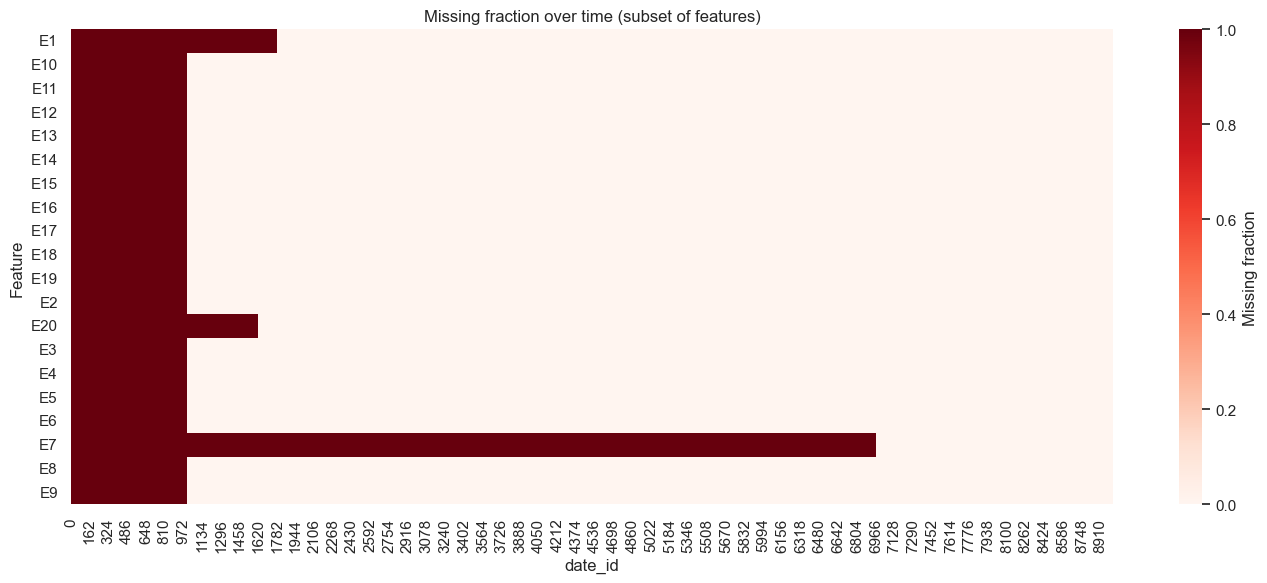

In [21]:
# For a subset of columns, see how missingness changes over time
subset_cols = [c for c in train.columns if c.startswith(("M", "E", "I", "P", "V", "S", "MOM"))][:20]

miss_over_time = (
    train[["date_id"] + subset_cols]
    .set_index("date_id")
    .isna()
    .groupby("date_id")
    .mean()
)

plt.figure(figsize=(14, 6))
sns.heatmap(miss_over_time.T, cmap="Reds", cbar_kws={"label": "Missing fraction"})
plt.title("Missing fraction over time (subset of features)")
plt.xlabel("date_id")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

#### Feature group summaries

In [22]:
def feature_group(col):
    if col.startswith("MOM"):
        return "MOM"
    elif col.startswith("M"):
        return "M"
    elif col.startswith("E"):
        return "E"
    elif col.startswith("I"):
        return "I"
    elif col.startswith("P"):
        return "P"
    elif col.startswith("V"):
        return "V"
    elif col.startswith("S"):
        return "S"
    elif col.startswith("D"):
        return "D"
    else:
        return "other"

cols = [c for c in train.columns if c not in ["date_id", target_col]]
group_info = []

for c in cols:
    grp = feature_group(c)
    group_info.append((c, grp))

group_df = pd.DataFrame(group_info, columns=["feature", "group"])
group_df.head()

,feature,group
0,D1,D
1,D2,D
2,D3,D
3,D4,D
4,D5,D


In [23]:
# Count features per group
group_counts = group_df["group"].value_counts()
group_counts

group
E        20
M        18
P        13
V        13
S        12
D         9
I         9
other     2
Name: count, dtype: int64

In [ ]:
# Average missingness per group
missing_frac = train.isna().mean()

group_missing = (
    group_df
    .assign(missing_frac=lambda d: d["feature"].map(missing_frac))
    .groupby("group")["missing_frac"]
    .mean()
    .sort_values(ascending=False)
)

group_missing

group
M        0.254062
S        0.201733
V        0.197573
E        0.152261
P        0.126952
I        0.111518
D        0.000000
other    0.000000
Name: missing_frac, dtype: float64

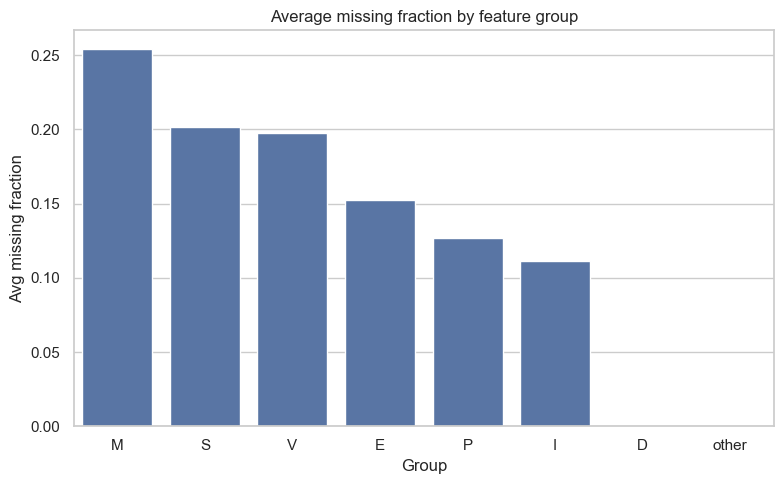

In [25]:
plt.figure(figsize=(8, 5))
sns.barplot(x=group_missing.index, y=group_missing.values)
plt.title("Average missing fraction by feature group")
plt.xlabel("Group")
plt.ylabel("Avg missing fraction")
plt.tight_layout()
plt.show()

#### Correlation with target

In [26]:
numeric_cols = train.select_dtypes(include=["number"]).columns.tolist()

corr_with_target = (
    train[numeric_cols]
    .corr(numeric_only=True)[target_col]
    .dropna()
    .sort_values(ascending=False)
)

corr_with_target.head(20)

market_forward_excess_returns    1.000000
forward_returns                  0.999943
V13                              0.062395
M1                               0.046111
S5                               0.040010
D2                               0.033946
D1                               0.033946
M2                               0.033238
V10                              0.032635
V7                               0.031484
S12                              0.026134
D8                               0.024786
M17                              0.024591
E19                              0.023503
S6                               0.022029
M3                               0.017107
D4                               0.016943
V9                               0.016662
D5                               0.016611
D6                               0.016600
Name: market_forward_excess_returns, dtype: float64

In [ ]:
corr_with_target.tail(20)

E13   -0.009874
S8    -0.010134
P3    -0.011776
P11   -0.011951
S7    -0.012034
M18   -0.012197
S3    -0.018133
P10   -0.019878
M8    -0.021811
P12   -0.022374
P7    -0.022679
P5    -0.023036
M12   -0.024582
I2    -0.025176
P8    -0.029591
E12   -0.030927
E11   -0.032131
E7    -0.032294
S2    -0.037886
M4    -0.066600
Name: market_forward_excess_returns, dtype: float64

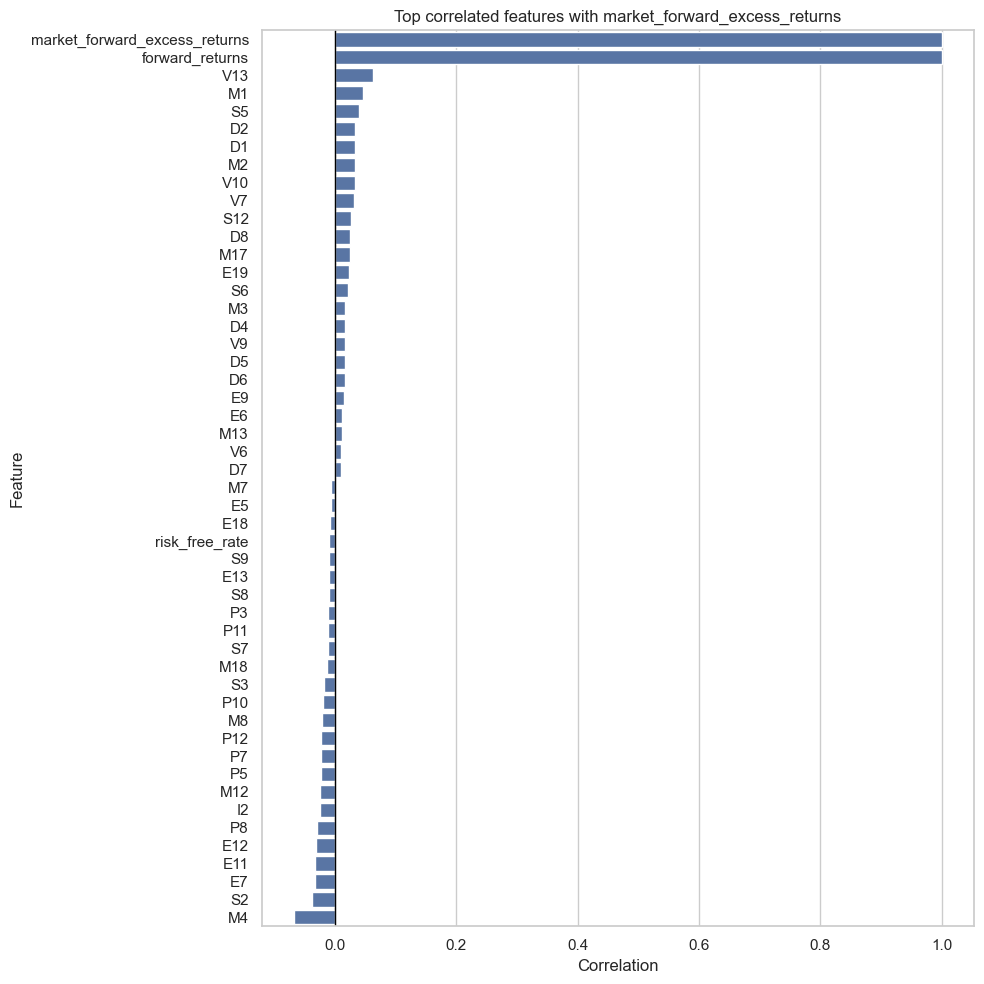

In [28]:
# Visualize top 25 positive and top 25 negative correlations
top_pos = corr_with_target.head(25)
top_neg = corr_with_target.tail(25)

corr_subset = pd.concat([top_pos, top_neg])

plt.figure(figsize=(10, 10))
sns.barplot(x=corr_subset.values, y=corr_subset.index)
plt.axvline(0, color="black", linewidth=1)
plt.title("Top correlated features with market_forward_excess_returns")
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

#### Compare early vs late periods (drift)

In [29]:
# Split data into 3 buckets by date_id: early, mid, late
unique_dates = train["date_id"].unique()
n_dates = len(unique_dates)

early_dates = unique_dates[: n_dates // 3]
mid_dates   = unique_dates[n_dates // 3 : 2 * n_dates // 3]
late_dates  = unique_dates[2 * n_dates // 3 :]

def subset_stats(dates, name):
    sub = train[train["date_id"].isin(dates)]
    desc = sub[target_col].describe()[["mean", "std", "min", "25%", "50%", "75%", "max"]]
    print(f"\n{name} period stats:")
    print(desc)

subset_stats(early_dates, "Early")
subset_stats(mid_dates, "Mid")
subset_stats(late_dates, "Late")


Early period stats:
mean    0.000022
std     0.009999
min    -0.036087
25%    -0.005043
50%     0.000048
75%     0.005294
max     0.035905
Name: market_forward_excess_returns, dtype: float64

Mid period stats:
mean   -0.000060
std     0.011668
min    -0.039942
25%    -0.005408
50%     0.000380
75%     0.005686
max     0.040058
Name: market_forward_excess_returns, dtype: float64

Late period stats:
mean    0.000198
std     0.009917
min    -0.040582
25%    -0.003976
50%     0.000278
75%     0.005301
max     0.040551
Name: market_forward_excess_returns, dtype: float64


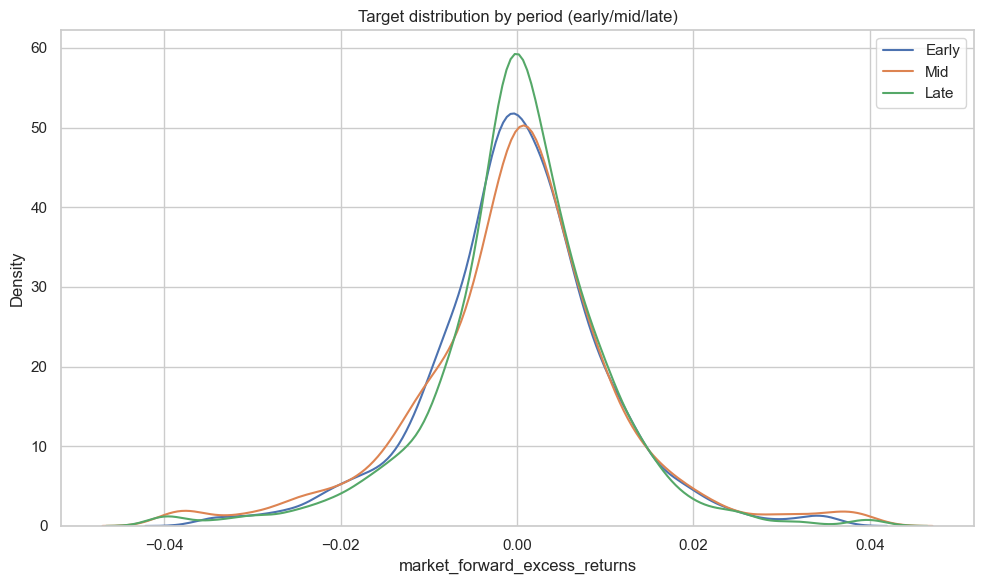

In [30]:
# Overlay distributions of target for early, mid, late
plt.figure(figsize=(10, 6))

for dates, label, color in [
    (early_dates, "Early", "tab:blue"),
    (mid_dates, "Mid", "tab:orange"),
    (late_dates, "Late", "tab:green"),
]:
    sub = train[train["date_id"].isin(dates)]
    sns.kdeplot(sub[target_col], label=label)

plt.title("Target distribution by period (early/mid/late)")
plt.legend()
plt.tight_layout()
plt.show()